In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
from xgboost import plot_importance, plot_tree
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV


import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
notebooks/model.ipynb
# Mute sklearn warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
simplefilter(action='ignore', category=DeprecationWarning)

# Show charts when running kernel
init_notebook_mode(connected=True)

# Change default background color for all cvisualizations
layout=go.Layout(paper_bgcolor='rgba(0,0,0,0)', plot_bgcolor='rgba(250,250,250,0.8)')
fig = go.Figure(layout=layout)
templated_fig = pio.to_templated(fig)
pio.templates['my_template'] = templated_fig.layout.template
pio.templates.default = 'my_template'


In [3]:
df = pd.read_csv("../data/hyundai_data_indicators.csv")
df.head()

,Date,Open Price,High,Low,Close Price,Total Traded Quantity,SMA,EWMA5,MiddleBand,UpperBand,LowerBand,RSI,MFI,ForceIndex,ATR,EMV
0,2016-01-04,147500.0,148000.0,143500.0,144000.0,445332,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-01-05,143000.0,145000.0,142000.0,143500.0,530496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.652480e+08,3750.0,NaN
2,2016-01-06,144000.0,145000.0,139000.0,140000.0,769406,NaN,NaN,NaN,NaN,NaN,0.0,NaN,-2.692921e+09,4500.0,-1.221064e+09
3,2016-01-07,138500.0,140000.0,137500.0,137500.0,586187,NaN,140100.000000,NaN,NaN,NaN,0.0,NaN,-1.465468e+09,4250.0,-1.277905e+09
4,2016-01-08,134500.0,138000.0,133500.0,136500.0,888701,140300.0,138718.009479,140300.0,147104.410334,133495.589666,0.0,NaN,-8.887010e+08,3500.0,-1.452574e+09


In [4]:
test_size  = 0.15
valid_size = 0.15

test_split_idx  = int(df.shape[0] * (1-test_size))
valid_split_idx = int(df.shape[0] * (1-(valid_size+test_size)))

train_df  = df.loc[:valid_split_idx].copy()
valid_df  = df.loc[valid_split_idx+1:test_split_idx].copy()
test_df   = df.loc[test_split_idx+1:].copy()

In [44]:
# drop_cols = ['Symbol', 'Total stock-data-nseTraded Quantity', 'Open Price', 'Low', 'High',"Average Trading Price",'52 Week Low','52 Week High','MiddleBand','LowerBand','UpperBand']
temp = df
# drop_cols = ['Symbol', 'Total Traded Quantity', 'Open Price', 'Low', 'High',"Average Trading Price",'MiddleBand','LowerBand','UpperBand','Date']
drop_cols = ['Low']

train_df = train_df.drop(columns=drop_cols)
valid_df = valid_df.drop(columns=drop_cols)
test_df  = test_df.drop(columns=drop_cols)

In [45]:

cols = ["Close Price"]# parameters = {
#     'n_estimators': 500,
#     'learning_rate': 0.05,
#     'max_depth': 8,
#     'gamma':0.001,
#     'random_state': 42
# }

y_train = train_df['Close Price'].copy()
X_train = train_df.drop(columns=cols)

y_valid = valid_df['Close Price'].copy()
X_valid = valid_df.drop(columns=cols)

y_test  = test_df['Close Price'].copy()
X_test  = test_df.drop(columns=cols)
True
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Total Traded Quantity  1310 non-null   int64  
 1   SMA                    1306 non-null   float64
 2   EWMA5                  1307 non-null   float64
 3   RSI                    1308 non-null   float64
 4   MFI                    1297 non-null   float64
 5   ForceIndex             1309 non-null   float64
 6   ATR                    1309 non-null   float64
 7   EMV                    1302 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 82.0 KB


In [46]:
# # TODO: FIX THE WARNINGS

# parameters = {
#     'n_estimators': range(100,1000,100),#500
#     'learning_rate': [0.001, 0.005, 0.01, 0.05] ,#0.05
#     'max_depth': [8, 10, 12, 15,20,32,64], #8
#     'gamma': [0.001, 0.005, 0.01, 0.02],#0.001
#     'random_state': [42]
# }

# eval_set = [(X_train, y_train), (X_valid, y_valid)]
# model = xgb.XGBRegressor(eval_set=eval_set, objective='reg:squarederror', verbose=False,random_state=42,silent=True)
# clf = GridSearchCV(model, parameters,verbose=False)

# clf.fit(X_train, y_train)

# print(f'Best params: {clf.best_params_}')
# print(f'Best validation score = {clf.best_score_}')


[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:47] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:48] WARNING: ../src/learner.cc:767: 
Parameters: { "eval_set", "silent", "verbose" } are not used.

[16:49:48] WARNING: ../src/learner.cc

KeyboardInterrupt: 

In [47]:
parameters = {
    'n_estimators': 500,
    'learning_rate': 0.05,
    'max_depth': 8,
    'gamma':0.001,
    'random_state': 42
}

model = xgb.XGBRegressor(**parameters, objective='reg:squarederror')
model.fit(X_train, y_train, eval_set=eval_set, verbose=False)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.001, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=8, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=500, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

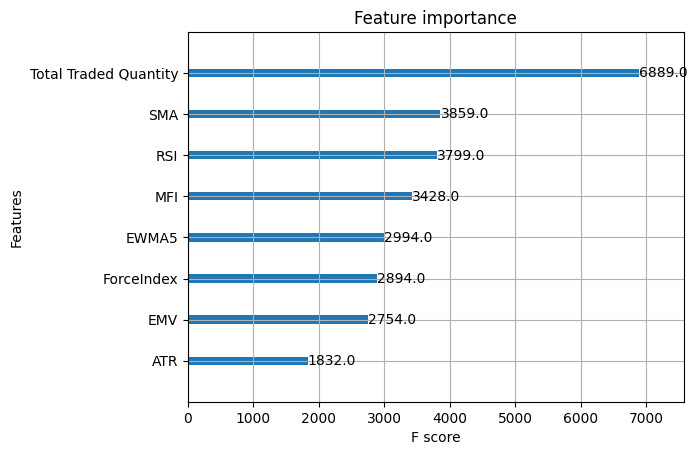

In [48]:
plot_importance(model)

In [49]:
y_pred = model.predict(X_test)
print(f'y_true = {np.array(y_test)[:5]}')
print(f'y_pred = {y_pred[:5]}')


y_true = [175500. 180500. 180000. 178000. 177500.]
y_pred = [177796.69 179709.75 180306.94 178668.5  177577.16]


In [51]:
print(f'mean_squared_error = {mean_squared_error(y_test, y_pred)}')

mean_squared_error = 17851897.890017264


In [52]:
predicted_prices = df.loc[test_split_idx+1:].copy()
predicted_prices['Close Price'] = y_pred
predicted_prices.head()

fig = make_subplots(rows=2, cols=1)
fig.add_trace(go.Scatter(x=temp.index, y=df['Close Price'],# parameters = {
#     'n_estimators': 500,
#     'learning_rate': 0.05,
#     'max_depth': 8,
#     'gamma':0.001,
#     'random_state': 42
# }

                         name='Truth',
                         marker_color='LightSkyBlue'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=predicted_prices['Close Price'],
                         name='Prediction',
                         marker_color='MediumPurple'), row=1, col=1)

fig.add_trace(go.Scatter(x=predicted_prices.index,
                         y=y_pred,
                         marker_color='MediumPurple',
                         showlegend=False), row=2, col=1)
# parameters = {
#     'n_estimators': 500,
#     'learning_rate': 0.05,
#     'max_depth': 8,
#     'gamma':0.001,
#     'random_state': 42
# }

fig.show()